In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import colors
from scipy.stats import multivariate_normal
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

plt.rcParams["figure.figsize"] = (15,15)


In [2]:
def plot_cov_ellipse(cov, pos, volume=.5, ax=None, fc='none', ec=[0,0,0], a=1, lw=2):
    """
    Plots an ellipse enclosing *volume* based on the specified covariance
    matrix (*cov*) and location (*pos*). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        volume : The volume inside the ellipse; defaults to 0.5
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
    """

    import numpy as np
    from scipy.stats import chi2
    import matplotlib.pyplot as plt
    from matplotlib.patches import Ellipse

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    kwrg = {'facecolor':fc, 'edgecolor':ec, 'alpha':a, 'linewidth':lw}

    # Width and height are "full" widths, not radius
    width, height = 2 * np.sqrt(chi2.ppf(volume,2)) * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwrg)

    ax.add_artist(ellip)

cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

/home/marlan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: covariance is not positive-semidefinite.
/home/marlan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: covariance is not positive-semidefinite.


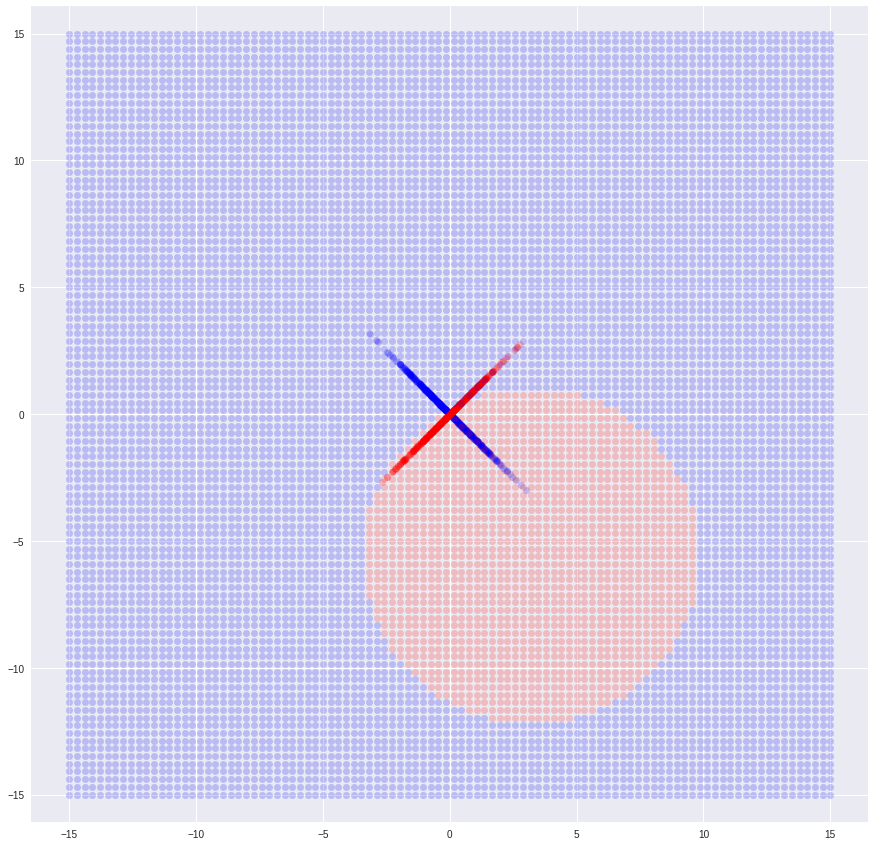

In [4]:
# Distribution parameters
mean_1 = [0, 0]
sigma_1 = 1.0
sigma_2 = 3.0
rho = -1
cov_1 = [[sigma_1**2, rho*sigma_1*sigma_2], [rho*sigma_1*sigma_2, sigma_2**2]]
x_1, y_1 = np.random.multivariate_normal(mean_1, cov_1, 500).T
mean_2 = [0,0]
cov_2 = [[2, 1], [1, 1]]  # diagonal covariance
x_2, y_2 = np.random.multivariate_normal(mean_2, cov_2, 500).T

#Train dots
df = pd.DataFrame({"x_dots": np.append(x_1, x_2), "y_dots": np.append(y_1, y_2)})
df['class'] = np.where(df.index >= 500, 1, 2)
clf = GaussianNB()
clf.fit(df[["x_dots", "y_dots"]], df["class"])

# Decision Rule
X = [(x,y) for x in np.linspace(-15,15,100) for y in np.linspace(-15,15,100)]  
Y = clf.predict(X)
class_1x = [x[0] for i, x in enumerate(X) if Y[i] == 1]
class_2x = [x[0] for i, x in enumerate(X) if Y[i] == 2]
class_1y = [x[1] for i, x in enumerate(X) if Y[i] == 1]
class_2y = [x[1] for i, x in enumerate(X) if Y[i] == 2]

# print X
plt.plot(x_1, y_1, 'o', color='blue', alpha=0.2,)
plt.plot(x_2, y_2, 'o', color='red', alpha=0.2,)
plot_cov_ellipse(cov_1, mean_1)
plot_cov_ellipse(cov_2, mean_2)
plt.plot(class_1x, class_1y, 'o', color='red', alpha=0.2,)
plt.plot(class_2x, class_2y, 'o', color='blue', alpha=0.2,)
plt.axis('equal')
plt.show()